# Preprocessing ``train.csv`` (15 points)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
traindf = pd.read_csv('train.csv')

In [3]:
traindf.head()

,region,tenure,age,income,marital,address zone,ed,employ,retire,gender,reside,custcat
0,3.0,999,23,31.0,Married,Zone 1,3.0,1,No,Female,2.0,D
1,2.0,59,30,34.0,Single,Zone 2,NaN,2,No,Female,1.0,B
2,3.0,3,20,17.0,Married,Zone 1,2.0,0,No,Female,4.0,A
3,3.0,44,32,96.0,Married,Zone 1,4.0,5,No,Female,4.0,D
4,1.0,11,26,53.0,Single,Zone 2,3.0,3,No,Male,1.0,D


In [4]:
traindf.shape

(800, 12)

In [5]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        774 non-null    float64
 1   tenure        800 non-null    int64  
 2   age           800 non-null    int64  
 3   income        784 non-null    float64
 4   marital       788 non-null    object 
 5   address zone  800 non-null    object 
 6   ed            781 non-null    float64
 7   employ        800 non-null    int64  
 8   retire        800 non-null    object 
 9   gender        800 non-null    object 
 10  reside        774 non-null    float64
 11  custcat       800 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 75.1+ KB


#### <font color='darkblue'> There are null values in the 5 columns.

In [6]:
traindf.describe()

,region,tenure,age,income,ed,employ,reside
count,774.000000,800.000000,800.000000,784.000000,781.000000,800.000000,774.000000
mean,2.043928,89.433750,41.630000,76.922194,2.669654,11.081250,2.326873
std,0.812664,223.174582,12.400517,108.286705,1.223054,10.152388,1.421650
min,1.000000,1.000000,19.000000,9.000000,1.000000,0.000000,1.000000
25%,1.000000,17.000000,32.000000,29.000000,2.000000,3.000000,1.000000
50%,2.000000,36.000000,40.000000,48.000000,3.000000,8.000000,2.000000
75%,3.000000,57.000000,51.000000,83.000000,4.000000,17.000000,3.000000
max,3.000000,999.000000,77.000000,1668.000000,5.000000,47.000000,8.000000


In [7]:
traindf.isna().sum()

region          26
tenure           0
age              0
income          16
marital         12
address zone     0
ed              19
employ           0
retire           0
gender           0
reside          26
custcat          0
dtype: int64

In [8]:
traindf.iloc[:,5].value_counts()

Zone 1     60
Zone 2     55
Zone 4     51
Zone 3     47
Zone 0     43
Zone 5     39
Zone 7     38
Zone 10    34
Zone 12    31
Zone 6     29
Zone 9     27
Zone 8     27
Zone 13    26
Zone 19    26
Zone 14    22
Zone 15    21
Zone 17    19
Zone 11    18
Zone 21    16
Zone 18    15
Zone 20    13
Zone 27    13
Zone 22    12
Zone 16    12
Zone 25    11
Zone 28    11
Zone 23     9
Zone 30     9
Zone 24     9
Zone 29     8
Zone 26     6
Zone 33     5
Zone 34     4
Zone 31     4
Zone 32     4
Zone 38     4
Zone 44     3
Zone 43     3
Zone 40     3
Zone 39     3
Zone 36     2
Zone 35     2
Zone 55     1
Zone 45     1
Zone 37     1
Zone 46     1
Zone 42     1
Zone 41     1
Name: address zone, dtype: int64

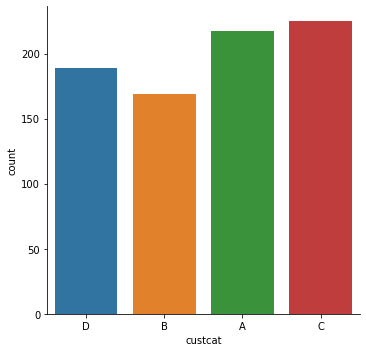

In [9]:
sns.catplot(x="custcat", kind="count",data=traindf)

#### <font color='darkblue'> Imputing missing values,

In [10]:
traindf.income.median()

48.0

In [11]:
traindf['income'].fillna((traindf['income'].median()), inplace=True)

In [12]:
traindf.marital.value_counts()

Married    368
Single     367
Unknown     53
Name: marital, dtype: int64

<font color='darkblue'> replacing missing values in marital status with 'Unknown', as a user might have opted to not declare the gender

In [13]:
traindf['marital'].replace({np.nan:'Unknown'},inplace=True)

In [14]:
traindf.marital.value_counts()

Married    368
Single     367
Unknown     65
Name: marital, dtype: int64

In [15]:
traindf.region.value_counts()

3.0    273
2.0    262
1.0    239
Name: region, dtype: int64

In [16]:
traindf['region'].fillna(3.0, inplace=True)

In [17]:
traindf.reside.value_counts()

1.0    282
2.0    228
3.0     97
4.0     94
5.0     48
6.0     21
8.0      2
7.0      2
Name: reside, dtype: int64

In [18]:
traindf['reside'].fillna(1.0, inplace=True)

In [19]:
traindf.ed.value_counts()

2.0    222
4.0    186
3.0    162
1.0    161
5.0     50
Name: ed, dtype: int64

In [20]:
traindf['ed'].fillna(2.0, inplace=True)

In [21]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        800 non-null    float64
 1   tenure        800 non-null    int64  
 2   age           800 non-null    int64  
 3   income        800 non-null    float64
 4   marital       800 non-null    object 
 5   address zone  800 non-null    object 
 6   ed            800 non-null    float64
 7   employ        800 non-null    int64  
 8   retire        800 non-null    object 
 9   gender        800 non-null    object 
 10  reside        800 non-null    float64
 11  custcat       800 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 75.1+ KB


In [22]:
traindf.head()

,region,tenure,age,income,marital,address zone,ed,employ,retire,gender,reside,custcat
0,3.0,999,23,31.0,Married,Zone 1,3.0,1,No,Female,2.0,D
1,2.0,59,30,34.0,Single,Zone 2,2.0,2,No,Female,1.0,B
2,3.0,3,20,17.0,Married,Zone 1,2.0,0,No,Female,4.0,A
3,3.0,44,32,96.0,Married,Zone 1,4.0,5,No,Female,4.0,D
4,1.0,11,26,53.0,Single,Zone 2,3.0,3,No,Male,1.0,D


#### <font color='darkblue'> Checking and treating outliers

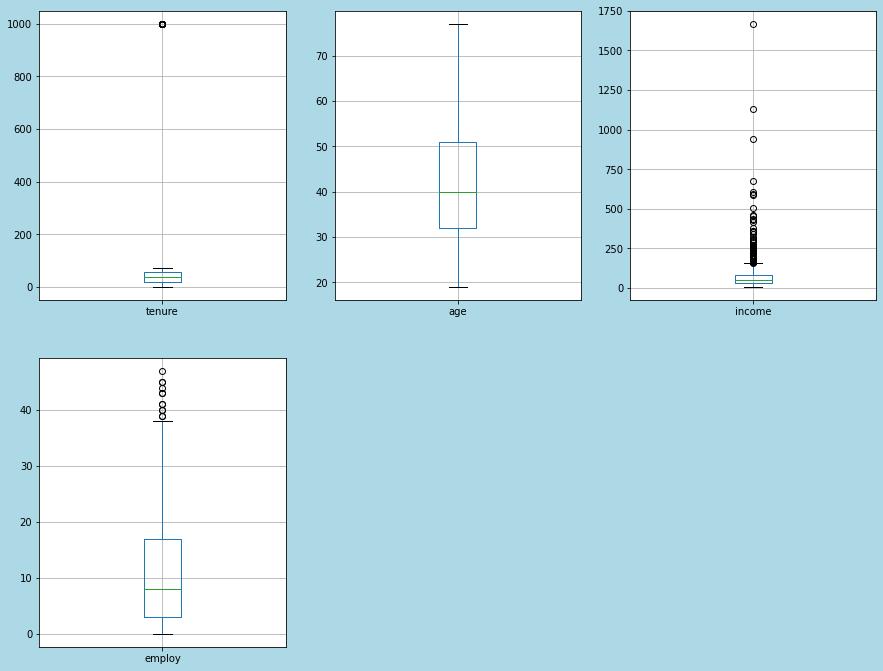

In [23]:
plt.figure(figsize=(15,50),facecolor = 'lightblue')
for i,col in enumerate(['tenure','age','income','employ'],start=1):
    plt.subplot(8, 3, i)
    traindf.boxplot(col,grid=True)
    

In [24]:
traindf.tenure.describe()

count    800.000000
mean      89.433750
std      223.174582
min        1.000000
25%       17.000000
50%       36.000000
75%       57.000000
max      999.000000
Name: tenure, dtype: float64

In [25]:
traindf.shape

(800, 12)

<AxesSubplot:xlabel='tenure'>

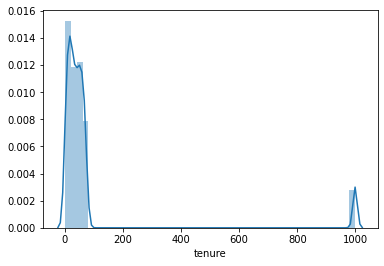

In [26]:
sns.distplot(traindf.tenure)

In [27]:
traindf.tenure.value_counts()

999    45
72     25
3      17
22     17
20     16
       ..
66      5
27      4
43      4
40      4
2       4
Name: tenure, Length: 73, dtype: int64

<font color='darkblue'> removing 999-tenure values with median.

In [28]:
traindf['tenure'].replace({999:np.nan},inplace=True)

In [29]:
traindf.tenure.describe()

count    755.000000
mean      35.221192
std       21.476595
min        1.000000
25%       17.000000
50%       34.000000
75%       54.000000
max       72.000000
Name: tenure, dtype: float64

In [30]:
traindf['tenure'].replace({np.nan:34},inplace=True)

<AxesSubplot:xlabel='employ'>

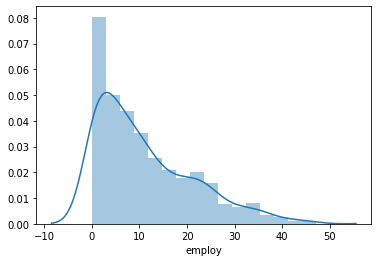

In [31]:
sns.distplot(traindf.employ)

<AxesSubplot:xlabel='income'>

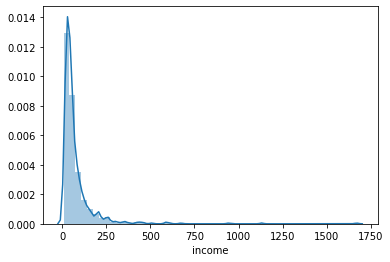

In [32]:
sns.distplot(traindf.income)

In [33]:
traindf.income.describe()

count     800.000000
mean       76.343750
std       107.273541
min         9.000000
25%        29.750000
50%        48.000000
75%        82.000000
max      1668.000000
Name: income, dtype: float64

<font color='darkblue'> removing records with higher income values 

In [34]:
filt= traindf['income'] < 300

In [35]:
traindf= traindf[filt]

In [36]:
traindf.shape

(779, 12)

In [37]:
traindf.employ.describe()

count    779.000000
mean      10.540436
std        9.673824
min        0.000000
25%        3.000000
50%        8.000000
75%       16.000000
max       47.000000
Name: employ, dtype: float64

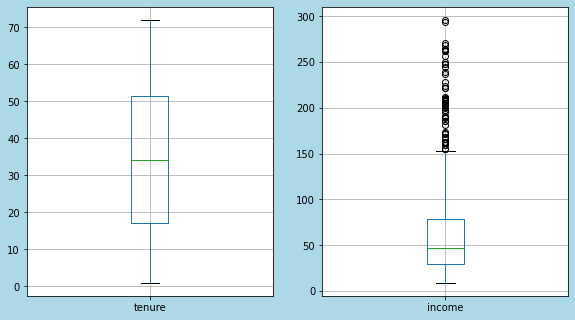

In [38]:
plt.figure(figsize=(15,50),facecolor = 'lightblue')
for i,col in enumerate(['tenure','income',],start=1):
    plt.subplot(8, 3, i)
    traindf.boxplot(col,grid=True)

<font color='darkblue'>checking for collinearity among numerical variables

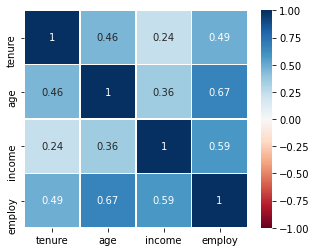

In [39]:
fig, ax = plt.subplots(figsize=(5,4)) 
sns.heatmap(traindf.iloc[:, [1,2,3,7]].corr(),linewidths = 0.5, cmap="RdBu",
            xticklabels=1,yticklabels=1,
            center=0,vmax=1, vmin = -1,annot=True,annot_kws={"size": 10})
plt.show()

#### <font color='darkblue'> Creating dummy variables

In [40]:
traindf['region']= traindf['region'].map({1.0:'1',2.0:'2',3.0:'3'})

/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
traindf['ed']= traindf['ed'].map({1.0:'1',2.0:'2',3.0:'3',4.0:'4',5.0:'5'})

/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
traindf['reside']= traindf['reside'].map({1.0:'1',2.0:'2',3.0:'3',4.0:'4',5.0:'5',6.0:'6',
                                         7.0:'7',8.0:'8'})

/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
region_dummies = pd.get_dummies(traindf.region, prefix = 'region' )

In [44]:
traindf = pd.concat([traindf,region_dummies],axis=1)
traindf.drop(['region'],axis=1,inplace=True)
traindf.head()

,tenure,age,income,marital,address zone,ed,employ,retire,gender,reside,custcat,region_1,region_2,region_3
0,34.0,23,31.0,Married,Zone 1,3,1,No,Female,2,D,0,0,1
1,59.0,30,34.0,Single,Zone 2,2,2,No,Female,1,B,0,1,0
2,3.0,20,17.0,Married,Zone 1,2,0,No,Female,4,A,0,0,1
3,44.0,32,96.0,Married,Zone 1,4,5,No,Female,4,D,0,0,1
4,11.0,26,53.0,Single,Zone 2,3,3,No,Male,1,D,1,0,0


<font color='darkblue'> dropping address zone column from the dataset as it does not seem to be significant factor for the prediction from the value distribution

In [45]:
traindf.drop(['address zone'], axis=1, inplace=True)

In [46]:
marital_dummies = pd.get_dummies(traindf.marital, prefix = 'Marital_status' )

In [47]:
traindf = pd.concat([traindf,marital_dummies],axis=1)
traindf.drop(['marital'],axis=1,inplace=True)
traindf.head()

,tenure,age,income,ed,employ,retire,gender,reside,custcat,region_1,region_2,region_3,Marital_status_Married,Marital_status_Single,Marital_status_Unknown
0,34.0,23,31.0,3,1,No,Female,2,D,0,0,1,1,0,0
1,59.0,30,34.0,2,2,No,Female,1,B,0,1,0,0,1,0
2,3.0,20,17.0,2,0,No,Female,4,A,0,0,1,1,0,0
3,44.0,32,96.0,4,5,No,Female,4,D,0,0,1,1,0,0
4,11.0,26,53.0,3,3,No,Male,1,D,1,0,0,0,1,0


In [48]:
educ_dummies = pd.get_dummies(traindf.ed, prefix = 'ed' )

In [49]:
traindf = pd.concat([traindf,educ_dummies],axis=1)
traindf.drop(['ed'],axis=1,inplace=True)
traindf.head()

,tenure,age,income,employ,retire,gender,reside,custcat,region_1,region_2,region_3,Marital_status_Married,Marital_status_Single,Marital_status_Unknown,ed_1,ed_2,ed_3,ed_4,ed_5
0,34.0,23,31.0,1,No,Female,2,D,0,0,1,1,0,0,0,0,1,0,0
1,59.0,30,34.0,2,No,Female,1,B,0,1,0,0,1,0,0,1,0,0,0
2,3.0,20,17.0,0,No,Female,4,A,0,0,1,1,0,0,0,1,0,0,0
3,44.0,32,96.0,5,No,Female,4,D,0,0,1,1,0,0,0,0,0,1,0
4,11.0,26,53.0,3,No,Male,1,D,1,0,0,0,1,0,0,0,1,0,0


In [50]:
reside_dummies = pd.get_dummies(traindf.reside, prefix = 'reside' )

In [51]:
traindf = pd.concat([traindf,reside_dummies],axis=1)
traindf.drop(['reside'],axis=1,inplace=True)
traindf.head()

,tenure,age,income,employ,retire,gender,custcat,region_1,region_2,region_3,...,ed_4,ed_5,reside_1,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8
0,34.0,23,31.0,1,No,Female,D,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,59.0,30,34.0,2,No,Female,B,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,3.0,20,17.0,0,No,Female,A,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,44.0,32,96.0,5,No,Female,D,0,0,1,...,1,0,0,0,0,1,0,0,0,0
4,11.0,26,53.0,3,No,Male,D,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [52]:
traindf.retire.value_counts()

No     744
Yes     35
Name: retire, dtype: int64

In [53]:
traindf['retire']= traindf['retire'].map({'No':0,'Yes':1})

In [54]:
traindf.gender.value_counts()

Female    400
Male      379
Name: gender, dtype: int64

In [55]:
traindf['gender']= traindf['gender'].map({'Male':1,'Female':0})

In [56]:
traindf.head()

,tenure,age,income,employ,retire,gender,custcat,region_1,region_2,region_3,...,ed_4,ed_5,reside_1,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8
0,34.0,23,31.0,1,0,0,D,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,59.0,30,34.0,2,0,0,B,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,3.0,20,17.0,0,0,0,A,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,44.0,32,96.0,5,0,0,D,0,0,1,...,1,0,0,0,0,1,0,0,0,0
4,11.0,26,53.0,3,0,1,D,1,0,0,...,0,0,1,0,0,0,0,0,0,0


#### <font color='darkblue'> Creating X and y dataframe

In [57]:
X = traindf.drop(['custcat'],axis=1)
X.head()

,tenure,age,income,employ,retire,gender,region_1,region_2,region_3,Marital_status_Married,...,ed_4,ed_5,reside_1,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8
0,34.0,23,31.0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
1,59.0,30,34.0,2,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3.0,20,17.0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
3,44.0,32,96.0,5,0,0,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0
4,11.0,26,53.0,3,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [58]:
X.columns

Index(['tenure', 'age', 'income', 'employ', 'retire', 'gender', 'region_1',
       'region_2', 'region_3', 'Marital_status_Married',
       'Marital_status_Single', 'Marital_status_Unknown', 'ed_1', 'ed_2',
       'ed_3', 'ed_4', 'ed_5', 'reside_1', 'reside_2', 'reside_3', 'reside_4',
       'reside_5', 'reside_6', 'reside_7', 'reside_8'],
      dtype='object')

In [59]:
y = traindf['custcat']
y.head()

0    D
1    B
2    A
3    D
4    D
Name: custcat, dtype: object

In [60]:
X.head()

,tenure,age,income,employ,retire,gender,region_1,region_2,region_3,Marital_status_Married,...,ed_4,ed_5,reside_1,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8
0,34.0,23,31.0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
1,59.0,30,34.0,2,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3.0,20,17.0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
3,44.0,32,96.0,5,0,0,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0
4,11.0,26,53.0,3,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [61]:
from pandas.plotting import scatter_matrix
attributes = X.columns[0:4]

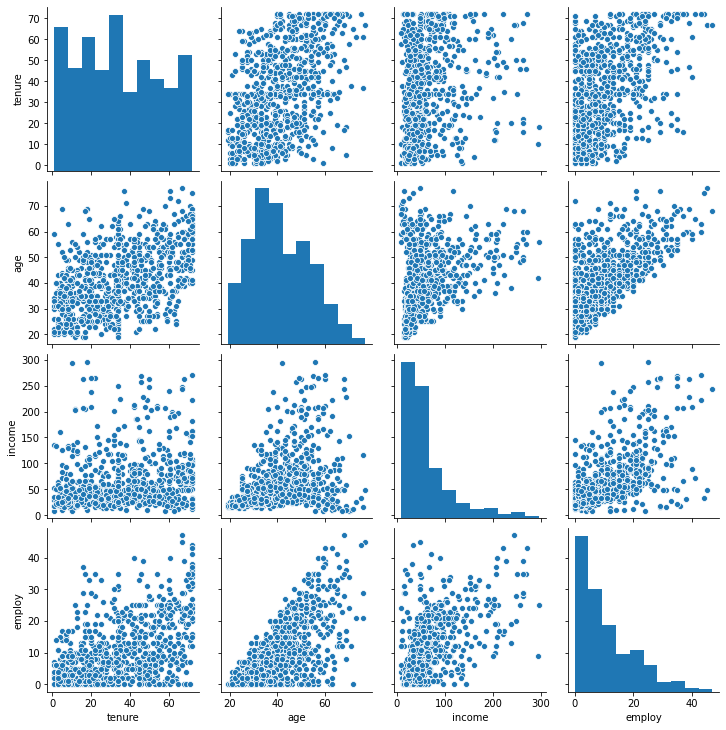

In [62]:
sns.pairplot(X[attributes], kind="scatter")
plt.show()

In [63]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [64]:
X_train.shape

(584, 25)

In [65]:
X_test.shape

(195, 25)

# Preprocessing ``test.csv`` (10 points)

In [66]:
testdf = pd.read_csv('test.csv')

In [67]:
testdf.head()

,Unnamed: 0,region,tenure,age,income,marital,address zone,ed,employ,retire,gender,reside
0,985,3.0,24,30,25.0,Single,Zone 0,4.0,5,0,Male,2.0
1,426,1.0,999,57,94.0,Married,Zone 21,1.0,22,0,Male,2.0
2,44,1.0,64,43,76.0,Married,Zone 20,4.0,20,0,Female,4.0
3,616,3.0,5,47,46.0,Single,Zone 7,1.0,6,0,Female,1.0
4,673,3.0,9,25,27.0,Single,Zone 3,1.0,4,0,Female,1.0


In [68]:
testdf = testdf.drop(testdf.columns[0],axis=1)
testdf.head()

,region,tenure,age,income,marital,address zone,ed,employ,retire,gender,reside
0,3.0,24,30,25.0,Single,Zone 0,4.0,5,0,Male,2.0
1,1.0,999,57,94.0,Married,Zone 21,1.0,22,0,Male,2.0
2,1.0,64,43,76.0,Married,Zone 20,4.0,20,0,Female,4.0
3,3.0,5,47,46.0,Single,Zone 7,1.0,6,0,Female,1.0
4,3.0,9,25,27.0,Single,Zone 3,1.0,4,0,Female,1.0


In [69]:
testdf.shape

(200, 11)

In [70]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        195 non-null    float64
 1   tenure        200 non-null    int64  
 2   age           200 non-null    int64  
 3   income        192 non-null    float64
 4   marital       195 non-null    object 
 5   address zone  200 non-null    object 
 6   ed            196 non-null    float64
 7   employ        200 non-null    object 
 8   retire        200 non-null    int64  
 9   gender        200 non-null    object 
 10  reside        195 non-null    float64
dtypes: float64(4), int64(3), object(4)
memory usage: 17.3+ KB


In [71]:
testdf.describe()

,region,tenure,age,income,ed,retire,reside
count,195.000000,200.000000,200.000000,192.000000,196.000000,200.000000,195.000000
mean,1.964103,94.070000,41.900000,73.515625,2.673469,0.060000,2.312821
std,0.839577,230.131392,13.203091,83.810805,1.226005,0.238083,1.467725
min,1.000000,1.000000,18.000000,9.000000,1.000000,0.000000,1.000000
25%,1.000000,19.000000,31.000000,28.750000,2.000000,0.000000,1.000000
50%,2.000000,37.000000,41.000000,44.000000,2.500000,0.000000,2.000000
75%,3.000000,59.000000,52.000000,81.500000,4.000000,0.000000,3.000000
max,3.000000,999.000000,76.000000,732.000000,5.000000,1.000000,7.000000


In [72]:
testdf.isna().sum()

region          5
tenure          0
age             0
income          8
marital         5
address zone    0
ed              4
employ          0
retire          0
gender          0
reside          5
dtype: int64

In [73]:
# dropping address zone
testdf = testdf.drop(['address zone'],axis=1)

#### <font color='darkblue'> Replacing with the the highest frequency values in the column for missing values.

In [74]:
testdf.region.value_counts()

1.0    72
3.0    65
2.0    58
Name: region, dtype: int64

In [75]:
testdf['region'].fillna(1.0, inplace=True)

In [76]:
testdf['income'].fillna((testdf.income.median()), inplace=True)

In [77]:
testdf.marital.value_counts()

Single     97
Married    86
Unknown    12
Name: marital, dtype: int64

In [78]:
testdf['marital'].replace({np.nan:'Unknown'},inplace=True)

In [79]:
testdf.ed.value_counts()

2.0    60
4.0    42
3.0    41
1.0    38
5.0    15
Name: ed, dtype: int64

In [80]:
testdf['ed'].fillna(2.0, inplace=True)

In [81]:
testdf.reside.value_counts()

1.0    81
2.0    39
3.0    36
4.0    21
5.0    10
6.0     6
7.0     2
Name: reside, dtype: int64

In [82]:
testdf['reside'].fillna(1.0, inplace=True)

In [83]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   200 non-null    float64
 1   tenure   200 non-null    int64  
 2   age      200 non-null    int64  
 3   income   200 non-null    float64
 4   marital  200 non-null    object 
 5   ed       200 non-null    float64
 6   employ   200 non-null    object 
 7   retire   200 non-null    int64  
 8   gender   200 non-null    object 
 9   reside   200 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 15.8+ KB


#### <font color='darkblue'>creating dummy variables

In [84]:
testdf['region']= testdf['region'].map({1.0:'1',2.0:'2',3.0:'3'})

In [85]:
testdf['ed']= testdf['ed'].map({1.0:'1',2.0:'2',3.0:'3',4.0:'4',5.0:'5'})

In [86]:
testdf['reside']= testdf['reside'].map({1.0:'1',2.0:'2',3.0:'3',4.0:'4',5.0:'5',6.0:'6',
                                         7.0:'7',8.0:'8'})

In [87]:
testregion_dummies = pd.get_dummies(testdf.region, prefix = 'region' )

In [88]:
testdf = pd.concat([testdf,testregion_dummies],axis=1)
testdf.drop(['region'],axis=1,inplace=True)
testdf.head()

,tenure,age,income,marital,ed,employ,retire,gender,reside,region_1,region_2,region_3
0,24,30,25.0,Single,4,5,0,Male,2,0,0,1
1,999,57,94.0,Married,1,22,0,Male,2,1,0,0
2,64,43,76.0,Married,4,20,0,Female,4,1,0,0
3,5,47,46.0,Single,1,6,0,Female,1,0,0,1
4,9,25,27.0,Single,1,4,0,Female,1,0,0,1


In [89]:
testmarital_dummies = pd.get_dummies(testdf.marital, prefix = 'Marital_status' )

In [90]:
testdf = pd.concat([testdf,testmarital_dummies],axis=1)
testdf.drop(['marital'],axis=1,inplace=True)
testdf.head()

,tenure,age,income,ed,employ,retire,gender,reside,region_1,region_2,region_3,Marital_status_Married,Marital_status_Single,Marital_status_Unknown
0,24,30,25.0,4,5,0,Male,2,0,0,1,0,1,0
1,999,57,94.0,1,22,0,Male,2,1,0,0,1,0,0
2,64,43,76.0,4,20,0,Female,4,1,0,0,1,0,0
3,5,47,46.0,1,6,0,Female,1,0,0,1,0,1,0
4,9,25,27.0,1,4,0,Female,1,0,0,1,0,1,0


In [91]:
testeduc_dummies = pd.get_dummies(testdf.ed, prefix = 'ed' )

In [92]:
testdf = pd.concat([testdf,testeduc_dummies],axis=1)
testdf.drop(['ed'],axis=1,inplace=True)
testdf.head()

,tenure,age,income,employ,retire,gender,reside,region_1,region_2,region_3,Marital_status_Married,Marital_status_Single,Marital_status_Unknown,ed_1,ed_2,ed_3,ed_4,ed_5
0,24,30,25.0,5,0,Male,2,0,0,1,0,1,0,0,0,0,1,0
1,999,57,94.0,22,0,Male,2,1,0,0,1,0,0,1,0,0,0,0
2,64,43,76.0,20,0,Female,4,1,0,0,1,0,0,0,0,0,1,0
3,5,47,46.0,6,0,Female,1,0,0,1,0,1,0,1,0,0,0,0
4,9,25,27.0,4,0,Female,1,0,0,1,0,1,0,1,0,0,0,0


In [93]:
testreside_dummies = pd.get_dummies(testdf.reside, prefix = 'reside' )

In [94]:
testdf = pd.concat([testdf,testreside_dummies],axis=1)
testdf.drop(['reside'],axis=1,inplace=True)
testdf.head()

,tenure,age,income,employ,retire,gender,region_1,region_2,region_3,Marital_status_Married,...,ed_3,ed_4,ed_5,reside_1,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7
0,24,30,25.0,5,0,Male,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,999,57,94.0,22,0,Male,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,64,43,76.0,20,0,Female,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3,5,47,46.0,6,0,Female,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,9,25,27.0,4,0,Female,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [95]:
testdf.retire.value_counts()

0    188
1     12
Name: retire, dtype: int64

In [96]:
testdf.gender.value_counts()

Female    104
Male       96
Name: gender, dtype: int64

In [97]:
testdf['gender']= testdf['gender'].map({'Male':1,'Female':0})

In [98]:
testdf.head()

,tenure,age,income,employ,retire,gender,region_1,region_2,region_3,Marital_status_Married,...,ed_3,ed_4,ed_5,reside_1,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7
0,24,30,25.0,5,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,999,57,94.0,22,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,64,43,76.0,20,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3,5,47,46.0,6,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,9,25,27.0,4,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [99]:
testdf.columns

Index(['tenure', 'age', 'income', 'employ', 'retire', 'gender', 'region_1',
       'region_2', 'region_3', 'Marital_status_Married',
       'Marital_status_Single', 'Marital_status_Unknown', 'ed_1', 'ed_2',
       'ed_3', 'ed_4', 'ed_5', 'reside_1', 'reside_2', 'reside_3', 'reside_4',
       'reside_5', 'reside_6', 'reside_7'],
      dtype='object')

In [100]:
traindf.columns

Index(['tenure', 'age', 'income', 'employ', 'retire', 'gender', 'custcat',
       'region_1', 'region_2', 'region_3', 'Marital_status_Married',
       'Marital_status_Single', 'Marital_status_Unknown', 'ed_1', 'ed_2',
       'ed_3', 'ed_4', 'ed_5', 'reside_1', 'reside_2', 'reside_3', 'reside_4',
       'reside_5', 'reside_6', 'reside_7', 'reside_8'],
      dtype='object')

In [101]:
# reside_8 is not present in testdf, whereas it is there in training dataset. 
#We will be adding reside_8 as a null column in testdf
testdf['reside_8'] = 0

In [102]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tenure                  200 non-null    int64  
 1   age                     200 non-null    int64  
 2   income                  200 non-null    float64
 3   employ                  200 non-null    object 
 4   retire                  200 non-null    int64  
 5   gender                  200 non-null    int64  
 6   region_1                200 non-null    uint8  
 7   region_2                200 non-null    uint8  
 8   region_3                200 non-null    uint8  
 9   Marital_status_Married  200 non-null    uint8  
 10  Marital_status_Single   200 non-null    uint8  
 11  Marital_status_Unknown  200 non-null    uint8  
 12  ed_1                    200 non-null    uint8  
 13  ed_2                    200 non-null    uint8  
 14  ed_3                    200 non-null    ui

<font color='darkblue'> employ is in object type, it has some null values as a 'space', now replacing it with median; and then converting into numeric type.

In [103]:
testdf.employ.value_counts()

0     23
3     14
4     12
5     11
8     11
6     10
2     10
9      9
11     8
15     8
1      7
20     7
19     6
13     6
7      6
21     5
18     4
14     4
22     4
12     3
       3
16     3
17     3
10     3
29     3
27     2
24     2
31     2
32     2
35     1
43     1
36     1
40     1
39     1
30     1
28     1
44     1
37     1
Name: employ, dtype: int64

In [104]:
testdf['employ'].replace({" ":'none'},inplace=True)

In [105]:
testdf['employ'].replace({'none':traindf.employ.median()},inplace=True)

In [106]:
testdf['employ'] = pd.to_numeric(testdf['employ'])

In [107]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tenure                  200 non-null    int64  
 1   age                     200 non-null    int64  
 2   income                  200 non-null    float64
 3   employ                  200 non-null    float64
 4   retire                  200 non-null    int64  
 5   gender                  200 non-null    int64  
 6   region_1                200 non-null    uint8  
 7   region_2                200 non-null    uint8  
 8   region_3                200 non-null    uint8  
 9   Marital_status_Married  200 non-null    uint8  
 10  Marital_status_Single   200 non-null    uint8  
 11  Marital_status_Unknown  200 non-null    uint8  
 12  ed_1                    200 non-null    uint8  
 13  ed_2                    200 non-null    uint8  
 14  ed_3                    200 non-null    ui

In [108]:
testdf.tenure.value_counts()

999    12
33      7
24      7
13      5
72      5
       ..
57      1
17      1
53      1
55      1
21      1
Name: tenure, Length: 68, dtype: int64

#### <font color='darkblue'> scaling test dataset

In [109]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_final_test = scaler.fit_transform(testdf)

# Machine learning models (20 points)

#### <font color='darkblue'> In the GridSearchCV for all the machine learning models, I have used 'precision_macro' as a scoring function, to get the average class precision score.

## <font color='maroon'> 1. KNN Classifier

In [110]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn_model = KNeighborsClassifier()

In [111]:
neighbors = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
print("neighbors:\n{}".format(neighbors))

neighbors:
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}


In [112]:
gridsearch_knn = GridSearchCV(knn_model, param_grid = neighbors, scoring='precision_macro',
                              cv=10, return_train_score=True)
gridsearch_knn.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='precision_macro', verbose=0)

In [113]:
df_gridsearch_knn = pd.DataFrame(gridsearch_knn.cv_results_)
df_gridsearch_knn.loc[:,['params','mean_train_score','mean_test_score','rank_test_score']]

,params,mean_train_score,mean_test_score,rank_test_score
0,{'n_neighbors': 1},1.000000,0.308945,14
1,{'n_neighbors': 2},0.733009,0.296814,15
2,{'n_neighbors': 3},0.640904,0.327017,11
3,{'n_neighbors': 4},0.586907,0.317122,13
4,{'n_neighbors': 5},0.542534,0.329336,10
5,{'n_neighbors': 6},0.543968,0.326303,12
6,{'n_neighbors': 7},0.519738,0.356315,2
7,{'n_neighbors': 8},0.518196,0.345040,6
8,{'n_neighbors': 9},0.502173,0.334845,9
9,{'n_neighbors': 10},0.485771,0.350885,5


In [114]:
print("Best cross-validation accuracy: {:.2f}".format(gridsearch_knn.best_score_))
print("Best parameters: {}".format(gridsearch_knn.best_params_))
print("Train Score: {:.2f}".format(gridsearch_knn.score(X_train, y_train)))
print("Test Score: {:.2f}".format(gridsearch_knn.score(X_test,y_test)))

Best cross-validation accuracy: 0.37
Best parameters: {'n_neighbors': 12}
Train Score: 0.48
Test Score: 0.33


## <font color='maroon'> 2. Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()

In [116]:
para_logit = {'penalty': ['l1','l2'],
              'solver': ['liblinear','lbfgs'],
             'C':[0.01,0.1,1,10]}

In [117]:
gridsearch_logit = GridSearchCV(logit_model, param_grid = para_logit, 
                                scoring='precision_macro', cv=5, return_train_score=True)
gridsearch_logit.fit(X_train, y_train)

/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-pack

/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-pack

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='precision_macro', verbose=0)

In [118]:
df_gridsearch_logit = pd.DataFrame(gridsearch_logit.cv_results_)
df_gridsearch_logit.loc[:,['params','mean_train_score','mean_test_score','rank_test_score']]

,params,mean_train_score,mean_test_score,rank_test_score
0,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...",0.069777,0.069776,12
1,"{'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,13
2,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...",0.404838,0.260507,10
3,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",0.330015,0.253920,11
4,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.301809,0.273325,9
5,"{'C': 0.1, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,14
6,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.432714,0.332579,8
7,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.434714,0.339198,7
8,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.448499,0.381153,1
9,"{'C': 1, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,15


In [119]:
print("Best parameters: {}".format(gridsearch_logit.best_params_))
print("Train Score: {:.2f}".format(gridsearch_logit.score(X_train, y_train)))
print("Test Score: {:.2f}".format(gridsearch_logit.score(X_test,y_test)))

Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Train Score: 0.43
Test Score: 0.36


## <font color='maroon'> 3. Decision Tree Classifier

In [120]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=0)

In [121]:
param_tree = {'max_depth':[1,2,3,4,5,6]}

In [122]:
gridsearch_tree = GridSearchCV(tree_model, param_tree, cv=5, return_train_score=True
                               ,scoring='precision_macro')
gridsearch_tree.fit(X_train, y_train)

/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-pack

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score

In [123]:
df_gridsearch_tree = pd.DataFrame(gridsearch_tree.cv_results_)
df_gridsearch_tree.loc[:,['params','mean_train_score','mean_test_score','rank_test_score']]

,params,mean_train_score,mean_test_score,rank_test_score
0,{'max_depth': 1},0.185441,0.156922,6
1,{'max_depth': 2},0.326600,0.240735,5
2,{'max_depth': 3},0.424901,0.276231,4
3,{'max_depth': 4},0.511379,0.319001,1
4,{'max_depth': 5},0.562437,0.311793,2
5,{'max_depth': 6},0.622011,0.291656,3


In [124]:
print("Best parameters: {}".format(gridsearch_tree.best_params_))
print("Train Score: {:.2f}".format(gridsearch_tree.score(X_train, y_train)))
print("Test Score: {:.2f}".format(gridsearch_tree.score(X_test,y_test)))

Best parameters: {'max_depth': 4}
Train Score: 0.49
Test Score: 0.35


## <font color='maroon'> 4. Linear SVC

In [125]:
from sklearn.svm import LinearSVC

In [126]:
para_lsvc = {'C':[ 0.001, 0.01, 0.1, 1, 10, 100]}

In [127]:
gridsearch_lsvc = GridSearchCV(LinearSVC(), param_grid = para_lsvc, cv=5, 
                               return_train_score=True,scoring='precision_macro')
gridsearch_lsvc.fit(X_train, y_train)

/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-pack

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='precision_macro', verbose=0)

In [128]:
print("Best parameters: {}".format(gridsearch_lsvc.best_params_))
df_gridsearch_lsvc = pd.DataFrame(gridsearch_lsvc.cv_results_)
df_gridsearch_lsvc[['params','mean_train_score','mean_test_score',
                               'rank_test_score']]

Best parameters: {'C': 100}


,params,mean_train_score,mean_test_score,rank_test_score
0,{'C': 0.001},0.404147,0.259327,6
1,{'C': 0.01},0.438385,0.337872,5
2,{'C': 0.1},0.452932,0.377450,3
3,{'C': 1},0.462700,0.377888,2
4,{'C': 10},0.461968,0.371387,4
5,{'C': 100},0.460037,0.400048,1


In [129]:
print("Best parameters: {}".format(gridsearch_lsvc.best_params_))
print("Train Score: {:.2f}".format(gridsearch_lsvc.score(X_train, y_train)))
print("Test Score: {:.2f}".format(gridsearch_lsvc.score(X_test, y_test)))

Best parameters: {'C': 100}
Train Score: 0.46
Test Score: 0.37


## <font color='maroon'> 5. SVM - Kernel : Poly

In [130]:
from sklearn.svm import SVC

In [131]:
para_svcpoly = {'C':[0.1, 1, 10, 100,1000],'degree': [2,3,4]}

In [132]:
gridsearch_svcpoly = GridSearchCV(SVC(kernel = 'poly', gamma = 'auto'), 
                                  param_grid = para_svcpoly
                                  , cv=5, return_train_score=True,
                                  scoring='precision_macro')
gridsearch_svcpoly.fit(X_train, y_train)


/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-pack

/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-pack

/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-pack

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='precision_macro', verbose=0)

In [133]:
print("Best parameters: {}".format(gridsearch_svcpoly.best_params_))
df_gridsearch_svcpoly = pd.DataFrame(gridsearch_svcpoly.cv_results_)
df_gridsearch_svcpoly[['params','mean_train_score','mean_test_score',
                               'rank_test_score']]

Best parameters: {'C': 100, 'degree': 3}


,params,mean_train_score,mean_test_score,rank_test_score
0,"{'C': 0.1, 'degree': 2}",0.069777,0.069776,9
1,"{'C': 0.1, 'degree': 3}",0.069777,0.069776,9
2,"{'C': 0.1, 'degree': 4}",0.069777,0.069776,9
3,"{'C': 1, 'degree': 2}",0.069777,0.069776,9
4,"{'C': 1, 'degree': 3}",0.069777,0.069776,9
5,"{'C': 1, 'degree': 4}",0.069777,0.069776,9
6,"{'C': 10, 'degree': 2}",0.531406,0.296692,6
7,"{'C': 10, 'degree': 3}",0.204209,0.105428,8
8,"{'C': 10, 'degree': 4}",0.069777,0.069776,9
9,"{'C': 100, 'degree': 2}",0.623835,0.349928,4


In [134]:
print("Best cross-validation accuracy: {:.2f}".format(gridsearch_svcpoly.best_score_))
print("Best parameters: {}".format(gridsearch_svcpoly.best_params_))
print("Train Score: {:.2f}".format(gridsearch_svcpoly.score(X_train, y_train)))
print("Test Score: {:.2f}".format(gridsearch_svcpoly.score(X_test, y_test)))

Best cross-validation accuracy: 0.38
Best parameters: {'C': 100, 'degree': 3}
Train Score: 0.60
Test Score: 0.39


## <font color='maroon'> 6. SVM - Kernel : RBF

In [135]:
from sklearn.svm import SVC

In [136]:
para_svcrbf = {'C':[0.1, 1, 10, 100,1000],'gamma': [0.01, 0.1, 1, 10]}

In [137]:
gridsearch_svcrbf = GridSearchCV(SVC(kernel = 'rbf'), 
                                  param_grid = para_svcrbf
                                  , cv=5, return_train_score=True,
                                  scoring='precision_macro')
gridsearch_svcrbf.fit(X_train, y_train)

/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-pack

/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-pack

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='precision_macro', verbose=0)

In [138]:
print("Best parameters: {}".format(gridsearch_svcrbf.best_params_))
df_gridsearch_svcrbf = pd.DataFrame(gridsearch_svcrbf.cv_results_)
df_gridsearch_svcrbf[['params','mean_train_score','mean_test_score',
                               'rank_test_score']]

Best parameters: {'C': 1000, 'gamma': 0.01}


,params,mean_train_score,mean_test_score,rank_test_score
0,"{'C': 0.1, 'gamma': 0.01}",0.069777,0.069776,17
1,"{'C': 0.1, 'gamma': 0.1}",0.119807,0.069776,17
2,"{'C': 0.1, 'gamma': 1}",0.069777,0.069776,17
3,"{'C': 0.1, 'gamma': 10}",0.069777,0.069776,17
4,"{'C': 1, 'gamma': 0.01}",0.288220,0.212719,16
5,"{'C': 1, 'gamma': 0.1}",0.511658,0.314762,10
6,"{'C': 1, 'gamma': 1}",0.775906,0.334196,8
7,"{'C': 1, 'gamma': 10}",0.957087,0.294311,15
8,"{'C': 10, 'gamma': 0.01}",0.428409,0.300909,14
9,"{'C': 10, 'gamma': 0.1}",0.654163,0.349707,4


In [139]:
print("Best cross-validation accuracy: {:.2f}".format(gridsearch_svcrbf.best_score_))
print("Best parameters: {}".format(gridsearch_svcrbf.best_params_))
print("Train Score: {:.2f}".format(gridsearch_svcrbf.score(X_train, y_train)))
print("Test Score: {:.2f}".format(gridsearch_svcrbf.score(X_test, y_test)))

Best cross-validation accuracy: 0.38
Best parameters: {'C': 1000, 'gamma': 0.01}
Train Score: 0.64
Test Score: 0.42


## <font color='maroon'> 7. SVC - Kernel : Linear

In [140]:
from sklearn.svm import SVC

In [141]:
para_svclin = {'C':[0.1, 1, 10,100]}

In [142]:
gridsearch_svclin = GridSearchCV(SVC(kernel = 'linear',gamma='auto'), 
                                  param_grid = para_svclin
                                  , cv=5, return_train_score=True,
                                  scoring='precision_macro')
gridsearch_svclin.fit(X_train, y_train)


/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-pack

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='precision_macro', verbose=0)

In [143]:
print("Best parameters: {}".format(gridsearch_svclin.best_params_))
df_gridsearch_svclin = pd.DataFrame(gridsearch_svclin.cv_results_)
df_gridsearch_svclin[['params','mean_train_score','mean_test_score',
                               'rank_test_score']]

Best parameters: {'C': 10}


,params,mean_train_score,mean_test_score,rank_test_score
0,{'C': 0.1},0.415396,0.291689,4
1,{'C': 1},0.477755,0.358536,3
2,{'C': 10},0.483009,0.366233,1
3,{'C': 100},0.487444,0.362108,2


In [144]:
print("Best cross-validation accuracy: {:.2f}".format(gridsearch_svclin.best_score_))
print("Best parameters: {}".format(gridsearch_svclin.best_params_))
print("Train Score: {:.2f}".format(gridsearch_svclin.score(X_train, y_train)))
print("Test Score: {:.2f}".format(gridsearch_svclin.score(X_test, y_test)))

Best cross-validation accuracy: 0.37
Best parameters: {'C': 10}
Train Score: 0.47
Test Score: 0.36


## <font color='maroon'> 8. Bagging - Decision Tree

In [145]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth = 4, random_state = 0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, 
                            bootstrap=True, random_state=0, oob_score = True)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [146]:
from sklearn.metrics import accuracy_score

print('Train score: %.2f'%bag_clf.score(X_train, y_train))
print('Test score: %.2f'%bag_clf.score(X_test, y_test))
print('Out-of-bag score: %.2f'%bag_clf.oob_score_)

Train score: 0.52
Test score: 0.39
Out-of-bag score: 0.39


#### Gridsearch

In [147]:
param_bagdt = {'n_estimators':[100,200, 300, 400,500,600], 
              'max_samples':[50,100,200,300,400] 
              }

In [148]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth = 4,random_state = 0)
                           , bootstrap=True,random_state=0)
gridsearch_bagdt = GridSearchCV(bag_clf, param_grid = param_bagdt, cv = 5,
                                scoring='precision_macro',n_jobs = -1)
gridsearch_bagdt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=4,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                            

In [149]:
gridsearch_bagdt.best_params_

{'max_samples': 100, 'n_estimators': 500}

In [150]:
gridsearch_bagdt.score(X_train, y_train)

0.5307549653625916

In [151]:
gridsearch_bagdt.score(X_test, y_test)

0.38876879699248124

## <font color='maroon'> 9. Pasting - Decision Tree

In [152]:
from sklearn.model_selection import GridSearchCV

param_bag = {'n_estimators':[100,200, 300, 400, 500], 
              'max_samples':[50,100,150,200,300,400]}

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth = 4, random_state = 0)
                            ,bootstrap= False,random_state=0)
bag_grid = GridSearchCV(bag_clf, param_grid = param_bag, cv = 5,scoring='precision_macro',
                        n_jobs = -1)
bag_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=4,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                            

In [153]:
bag_grid.best_params_

{'max_samples': 300, 'n_estimators': 400}

In [154]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth = 4, random_state = 0), 
                           bootstrap= False,
                           max_samples= 300,
                           n_estimators= 400,random_state=0)

In [155]:
bag_clf.fit(X_train, y_train)

print('Train score: %.2f'%bag_clf.score(X_train, y_train))
print('Test score: %.2f'%bag_clf.score(X_test, y_test))

Train score: 0.55
Test score: 0.35


In [156]:
bag_grid.score(X_train, y_train)

0.562266838968717

In [157]:
bag_grid.score(X_test, y_test)

0.35889742825178966

## <font color='maroon'> 10. Voting Classifier - Hard Voting

In [158]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score

In [159]:
bagdt_clf = BaggingClassifier(DecisionTreeClassifier(max_depth = 4,random_state = 0)
                           , bootstrap=True,max_samples =100, 
                              n_estimators= 500,random_state=0)

svcrbf_clf = SVC(kernel = 'rbf',C = 1000, gamma = 0.01,
                 random_state= 0)
svcrbf_clf.fit(X_train, y_train)

svcpoly_clf = SVC(kernel = 'poly', gamma = 'auto', C=100, degree=3,
                 random_state=0)

voting_clf = VotingClassifier(estimators=[('bagdt', bagdt_clf), ('svcrbf', svcrbf_clf), 
                                          ('svcpoly', svcpoly_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (bagdt_clf, svcrbf_clf, svcpoly_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, '%.4f'%precision_score(y_test, y_pred,average='macro'))


BaggingClassifier 0.3888
SVC 0.4179
SVC 0.3935
VotingClassifier 0.4215


## <font color='maroon'> 11. Voting Classifier - Soft Voting

In [160]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

In [161]:
#dt_clf = DecisionTreeClassifier(max_depth = 4, random_state = 0)
#dt_clf.fit(X_train, y_train)
bagdt_clf = BaggingClassifier(DecisionTreeClassifier(max_depth = 4,random_state = 2)
                           , bootstrap=True,max_samples =100, 
                              n_estimators= 500,random_state=2)

svcrbf_clf = SVC(kernel = 'rbf',C = 1000, gamma = 0.01,probability=True,
                 random_state= 2)
svcrbf_clf.fit(X_train, y_train)

svcpoly_clf = SVC(kernel = 'poly', gamma = 'auto', C=100, degree=3,probability=True,
                 random_state=2)

voting_clf = VotingClassifier(estimators=[('bagdt', bagdt_clf), ('svcrbf', svcrbf_clf), 
                                          ('svcpoly', svcpoly_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (bagdt_clf, svcrbf_clf, svcpoly_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, '%.2f'%precision_score(y_test, y_pred,average='macro'))


BaggingClassifier 0.38
SVC 0.42
SVC 0.39
VotingClassifier 0.38


## <font color='maroon'> 12. RandomForest Classifier

In [162]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
param_rf = {'max_depth':[1,2,3], 
              'n_estimators':[300,400,500], 
              'max_samples':[0.2,0.5], 
              'max_features':[0.2,0.5],
              'bootstrap':[True, False]}

In [164]:
gridsearch_rf = GridSearchCV(RandomForestClassifier(random_state = 0), 
                       param_grid=param_rf, cv = 5, scoring= 'precision_macro')
gridsearch_rf.fit(X_train, y_train)

/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-pack

/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-pack

/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-pack

/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-pack

/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-pack

/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-pack

/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mitansh/opt/anaconda3/lib/python3.7/site-pack

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [165]:
gridsearch_rf.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 0.2,
 'max_samples': 0.2,
 'n_estimators': 300}

In [166]:
rf = RandomForestClassifier(bootstrap = True, max_depth = 2, max_features = 0.2, 
                            max_samples = 0.2, n_estimators = 300, random_state = 0)

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features=0.2,
                       max_leaf_nodes=None, max_samples=0.2,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [167]:
from sklearn.metrics import confusion_matrix

print('Confusion matrix: \n', confusion_matrix(y_train, rf.predict(X_train)))

Confusion matrix: 
 [[106   0  45  12]
 [ 31   5  58  32]
 [ 58   0  87  15]
 [ 43   1  35  56]]


In [168]:
y_pred = rf.predict(X_test)

In [169]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average ='macro')

0.32514750874125875

## <font color='maroon'> 13. AdaBoost

In [170]:
from sklearn.ensemble import AdaBoostClassifier

ada_dt = AdaBoostClassifier(SVC(kernel = 'rbf',C = 1000, gamma = 0.01,
                 random_state= 0), algorithm="SAMME", random_state=0)


In [171]:
param_ada = {'n_estimators':[300,400,500], 
              'learning_rate': [0.1,0.2,0.3,0.4]}

In [172]:
gridsearch_ada = GridSearchCV(ada_dt,param_grid=param_ada, cv = 5, 
                              scoring= 'precision_macro')
gridsearch_ada.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=SVC(C=1000,
                                                             break_ties=False,
                                                             cache_size=200,
                                                             class_weight=None,
                                                             coef0=0.0,
                                                             decision_function_shape='ovr',
                                                             degree=3,
                                                             gamma=0.01,
                                                             kernel='rbf',
                                                             max_iter=-1,
                                                             probability=False,
                                                             

In [173]:
gridsearch_ada.best_params_

{'learning_rate': 0.2, 'n_estimators': 300}

In [174]:
gridsearch_ada.score(X_train,y_train)

0.4117773965916381

In [175]:
gridsearch_ada.score(X_test,y_test)

0.3708771100075448

## <font color='maroon'> 14. GradientBoosting

In [176]:
from  sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(max_depth=1, n_estimators=200, 
                                   learning_rate=1.0, random_state=0)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [177]:
gb_clf.score(X_train, y_train)

0.6934931506849316

In [178]:
gb_clf.score(X_test, y_test)

0.3641025641025641

In [179]:
gb_clf = GradientBoostingClassifier(max_depth=1, random_state=0)

In [180]:
param_gb = {'n_estimators':[50,100,200], 
              'learning_rate': [0.1,0.2,0.5]}

In [181]:
gridsearch_gb = GridSearchCV(gb_clf,param_grid=param_gb, cv = 5, 
                              scoring= 'precision_macro')
gridsearch_gb.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=1,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [182]:
gridsearch_gb.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

In [183]:
gridsearch_gb.score(X_train, y_train)

0.4697838841069054

In [184]:
gridsearch_gb.score(X_test, y_test)

0.36480854150027076

# Best model ( 5 points)

### <font color='maroon'> Hard Voting Classifier

#### <font color='darkblue'>I would select Hard Voting Classifier as the best model. It produces the macro precision score of 0.4215. 
#### <font color='darkblue'>It is ensembled from Bagging Classifier, SVC kernel Poly and rbf with respective best hyperparameters. 
#### <font color='darkblue'> Individual models are performing with low precision scores.
#### <font color='darkblue'> Also, there are high value differences in training and testing precision scores for individual models. 
#### <font color='darkblue'>So, to increase the probability of correction and since Hard Voting Classifier is the best performing model on the measure of precision score, it is the best model for the dataset. 

In [185]:
#Running the best model to predict final test output.
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

bagdt_clf = BaggingClassifier(DecisionTreeClassifier(max_depth = 4,random_state = 0)
                           , bootstrap=True,max_samples =100, 
                              n_estimators= 500,random_state=0)

svcrbf_clf = SVC(kernel = 'rbf',C = 1000, gamma = 0.01,
                 random_state= 0)
svcrbf_clf.fit(X_train, y_train)

svcpoly_clf = SVC(kernel = 'poly', gamma = 'auto', C=100, degree=3,
                 random_state=0)

voting_clf = VotingClassifier(estimators=[('bagdt', bagdt_clf), ('svcrbf', svcrbf_clf), 
                                          ('svcpoly', svcpoly_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

final_test_prediction = voting_clf.predict(X_final_test)

# Grading (50 points)

In [186]:
final_test_prediction

array(['A', 'C', 'D', 'A', 'A', 'D', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'C', 'A', 'A', 'A', 'A',
       'A', 'A', 'B', 'A', 'C', 'A', 'D', 'A', 'A', 'D', 'D', 'A', 'C',
       'A', 'D', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'D', 'A', 'D',
       'D', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'D', 'B', 'A', 'C',
       'A', 'D', 'A', 'A', 'A', 'A', 'A', 'A', 'D', 'A', 'D', 'A', 'A',
       'A', 'A', 'A', 'A', 'C', 'A', 'D', 'D', 'B', 'A', 'D', 'A', 'C',
       'A', 'A', 'A', 'A', 'C', 'A', 'B', 'A', 'A', 'A', 'A', 'C', 'A',
       'A', 'A', 'D', 'A', 'A', 'A', 'A', 'D', 'A', 'A', 'B', 'D', 'A',
       'A', 'D', 'A', 'A', 'A', 'A', 'A', 'A', 'D', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'D', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'D', 'A', 'A', 'A', 'A', 'A', 'A', 'C', 'C', 'A', 'D',
       'A', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'C', 'D',
       'C', 'A', 'D', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A